#06-1 신경망 알고리즘을 벡터화하여 한 번에 전체 샘플을 사용하자.



### 벡터화된 연산은 알고리즘의 성능을 올린다.

넘파이, 머신러닝, 딥러닝 패키지들은 다차원 배열의 계산을 빠르게 수행할 수 있다. 이런 기능을 벡터화된 연산이라고 한다.


**배치 경사 하강법으로 성능을 올린다.**

지금까지는 '확률적 경사 하강법'을 사용했다.

 * 확률적 경사 하강법 : 손실 함수의 전역 최솟값을 불안정하게 찾는다
 * 배치 경사 하강법 손실 함수의 전역 최솟값을 안정적으로 찾는다.


 단, 배치 하강법은 가중치를 1번 업데이트 할 때 사용되는 데이터의 개수가 많으므로 알고리즘 1번 수행당 계산 비용이 많이 든다는 점에 주의해야 한다.

 ### 벡터 연산과 행렬 연산을 알아보자.

 **점 곱을 알아보자**

 단일층 신경망에서 z를 구했던 방법을 떠올려보자.

 ```
 z = np.sum(x * self.w) + self.b
 ```

 위의 식에서 입력과 가중치의 곱을 x * self.w로 간단하게 표현할 수 있는 이유는 넘파이의 원소별 곱셈기능 덕분이다. 다음의 원리로 가중치와 입력의 곱에 대한 합을 한 번에 계산할 수 있었던 것이다.

 ```
 x = [x1,x2,x3, ...xn]
 w = [w1,w2,w3, ...wn]
 x * n = [x1 *w1, x2*w2, ... , xn * wn]
 ```

이때 **x**와 **w**는 벡터라고 부르고 벡터는 볼드로 표기한다.

그리고 위의 두 벡터를 곱하여 구하는 계산(np.sum(x * self.w))을 점 곱(dot product) 또는 스칼라 곱(scalar product)이라고 한다.

 **점 곱을 행렬 곱셈으로 표현한다.**

점 곱을 행렬 곱셈으로 표현하면 행 방향으로 놓인 첫 번째 벡터와 열 방향으로 놓인 두 번째 벡터의 원소를 각각 곱한 후 모두 더하는 것과 같다.

행렬의 곱셈을 계산하는 넘파이의 np.dot(x, self.w)를 다음과 같이 수정할 수 있다.

```
z = np.dot(x, self.w) + self.b
```


**전체 샘플에 대한 가중치 곱의 합을 행렬 곱셈으로 구한다.**

행렬 곱셈을 강조하기 위해 소문자 알파벳이 아니라 대문자 알파벳으로 X와 W를 사용하자.


일반적으로 행렬 곱셈을 통해 만들어지는 결과 행렬의 크기는 다음과 같이 표기한다.

```
(m,n) * (n,k) = (m,k)
```

이것을 통해 첫 번째 행의 열(n)과 두 번째 행렬의 행(n) 크기는 반드시 같아야 한다는 점도 알 수 있다.

```
np.dot(x,w)
```

이제 행렬 연산을 사용하여 SingleLayer 클래스에 배치 경사 하강법을 적용해보자.


###  SingleLayer 클래스에 배치 경사 하강법 적용하기

1. 먼저 넘파이와 맷플롯립을 임포트하자.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

2. 위스콘신 유방암 데이터 세트를 훈련, 검증, 테스트 세트로 나누고 데이터 살펴보기.

유방암 데이터 세트를 cancer 변수에 대입하고 데이터 세트를 훈련, 검증, 테스트 세트로 나눈다.


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify = y,
                                                            test_size = 0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all,
                                                  stratify = y_train_all, test_size=0.2, random_state=42)

3. 훈련 세트와 검증 세트의 크기를 확인해보자.


In [ ]:
print(x_train.shape, x_val.shape)

(364, 30) (91, 30)


4. 정방향 계산을 행렬 곱셈으로 표현하기

XW + b = ***

5. 그레이디언트 계산 이해하기.

그레이디언트는 오차와 입력 데이터의 곱이므로 다음과 같은 행렬 곱셈으로 표현할 수 있다. 여기에서 $X^T$는 X를 전치한 것이고 E는 오차들을 모은 것이다.

$X^TE$

행렬을 전치하면 행과 열이 바뀌므로 샘플의 각 특성들을 오차에 곱할 수 있는 형태가 된다.

6. forpass() backprop() 메서드에 배치 경사 하강법 적용하기.

In [ ]:
def forpass(self,w):
  z = np.dot(x, self.w) + self.b
  return

def backprop(self, x, err):
  m = len(x)
  w_grad = np.dot(x.T, err) / m
  b_grad = np.sum(err) / m
  return w_grad, b_grad


7. fit() 메서드 수정하기

배치 경사 하강법에서는 forpass() 메서드와 backprop() 메서드에서 전체 샘플을 한꺼번에 계산하므로 두 번째 for문이 삭제됩니다. fit() 메서드의 코드는 다음과 같다.

In [ ]:
  def fit(self, x, y, epochs=100, x_val = None, y_val = None):
    y = y.reshape(-1, 1)
    y_val = y_val.reshape(-1,1)
    m = len(x)
    self.w = np.ones((x.shape[1], 1))
    self.b = 0
    self.w_history.append(self.w.copy())
    #epochs 만큼 반복
    for i in range(epochs):
      z = self.forpass(x)
      a = self.activation(z)
      err = -(y - a)
      # 오차를 역전파 하여 그레이디언트를 계산
      w_grad, b_grad = self.backprop(x, err)
      # 그레이디언트에 페널티 항의 미분값을 더한다.
      w_grad += (self.l1 * np.sign(self.w) + self.l2 * self.w) / m
      # 가중치와 절편을 업데이트
      self.w -=  self.lr * w_grad
      self.b -=  self.lr * b_grad
      # 가중치를 기록
      self.w_hitory.append(self.w.copy())
      # 안전한 로그 계산을 위해 클리핑한다.
      a = np.clip(a, 1e-10, 1-1e-10)
      # 로그 손실과 규제 손실을 더하여 리스트에 추가한다.
      loss = np.sum(-(y*np.log(a) + (1-y)*np.log(1-a)))
      self.losses.append((loss + self.reg_loss()) / m)
      # 검증 세트에 대한 손실을 계산한다.
      self.update_val_loss(x_val, y_val)

전체 구조는 확률적 경사 하강법과 비슷하지만  for문이 한 단계 삭제되어 코드가 훨씬 간단해졌다. 활성화 출력 a가 열 벡터이므로 이에 맞추어 타깃값을 (m,1) 크기의 열 벡터로 변환하였고 평균 손실을 구하기 위해 np.sum() 함수로 각 샘플의 손실을 더한 후 전체 샘플의 개수로 나누었다.

8. 나머지 메서드 수정하기.

predict() 메서드에서는 사용했던 리스트 내포와 updata_val_loss() 메서드도 더 간단해졌다.

In [ ]:
def predict(self, x):
  z = self.forpass(x)
  return z > 0

def update_val_loss(self, x_val, y_val):
  z = self.forpass(x_val)
  a = self.activation(z)
  a = np.clip(a, 1e-10, 1-1e-10)
  # 로그 손실과 규제 손실을 더하여 리스트에 추가한다.
  val_loss = np.sum(-(y_val*np.log(a) + (1-y_val)*np.log(1-a)))
  self.val_losses.append((val_loss + self.reg_loss())/ len(y_val))

전체 코드

In [ ]:
class SingleLayer:

    def __init__(self, learning_rate=0.1, l1=0, l2=0):
        self.w = None              # 가중치
        self.b = None              # 절편
        self.losses = []           # 훈련 손실
        self.val_losses = []       # 검증 손실
        self.w_history = []        # 가중치 기록
        self.lr = learning_rate    # 학습률
        self.l1 = l1               # L1 손실 하이퍼파라미터
        self.l2 = l2               # L2 손실 하이퍼파라미터

    def forpass(self, x):
        z = np.dot(x, self.w) + self.b        # 선형 출력을 계산합니다.
        return z

    def backprop(self, x, err):
        m = len(x)
        w_grad = np.dot(x.T, err) / m         # 가중치에 대한 그래디언트를 계산합니다.
        b_grad = np.sum(err) / m              # 절편에 대한 그래디언트를 계산합니다.
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, -100, None)            # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))              # 시그모이드 계산
        return a

    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        y = y.reshape(-1, 1)                  # 타깃을 열 벡터로 바꿉니다.
        y_val = y_val.reshape(-1, 1)
        m = len(x)                            # 샘플 개수를 저장합니다.
        self.w = np.ones((x.shape[1], 1))     # 가중치를 초기화합니다.
        self.b = 0                            # 절편을 초기화합니다.
        self.w_history.append(self.w.copy())  # 가중치를 기록합니다.
        # epochs만큼 반복합니다.
        for i in range(epochs):
            z = self.forpass(x)               # 정방향 계산을 수행합니다.
            a = self.activation(z)            # 활성화 함수를 적용합니다.
            err = -(y - a)                    # 오차를 계산합니다.
            # 오차를 역전파하여 그래디언트를 계산합니다.
            w_grad, b_grad = self.backprop(x, err)
            # 그래디언트에 페널티 항의 미분 값을 더합니다.
            w_grad += (self.l1 * np.sign(self.w) + self.l2 * self.w) / m
            # 가중치와 절편을 업데이트합니다.
            self.w -= self.lr * w_grad
            self.b -= self.lr * b_grad
            # 가중치를 기록합니다.
            self.w_history.append(self.w.copy())
            # 안전한 로그 계산을 위해 클리핑합니다.
            a = np.clip(a, 1e-10, 1-1e-10)
            # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
            loss = np.sum(-(y*np.log(a) + (1-y)*np.log(1-a)))
            self.losses.append((loss + self.reg_loss()) / m)
            # 검증 세트에 대한 손실을 계산합니다.
            self.update_val_loss(x_val, y_val)

    def predict(self, x):
        z = self.forpass(x)      # 정방향 계산을 수행합니다.
        return z > 0             # 스텝 함수를 적용합니다.

    def score(self, x, y):
        # 예측과 타깃 열 벡터를 비교하여 True의 비율을 반환합니다.
        return np.mean(self.predict(x) == y.reshape(-1, 1))

    def reg_loss(self):
        # 가중치에 규제를 적용합니다.
        return self.l1 * np.sum(np.abs(self.w)) + self.l2 / 2 * np.sum(self.w**2)

    def update_val_loss(self, x_val, y_val):
        z = self.forpass(x_val)            # 정방향 계산을 수행합니다.
        a = self.activation(z)             # 활성화 함수를 적용합니다.
        a = np.clip(a, 1e-10, 1-1e-10)     # 출력 값을 클리핑합니다.
        # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
        val_loss = np.sum(-(y_val*np.log(a) + (1-y_val)*np.log(1-a)))
        self.val_losses.append((val_loss + self.reg_loss()) / len(y_val))

9. 훈련 데이터 표준화 전처리하기.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)


이제 이 데이터를 SingleLayer 클래스 객체에 전달하여 배치 경사하강법을 적용해보자.

In [ ]:
single_layer = SingleLayer(l2 = 0.01)
single_layer.fit(x_train_scaled, y_train,
                 x_val = x_val_scaled, y_val = y_val, epochs = 10000)
single_layer.score(x_val_scaled, y_val)

0.978021978021978

05장의 결과와 비교하기 위해 L2 규제 매개변수의 값을 0.01로 지정했으며 에포크 매개변수(epochs)의 기본값을 10,000으로 크게 늘렸다. 배치 경사 하강법은 전체 훈련 세트를 한 번에 계산한 다음 오차를 역전파 하기 때문에 에포크 횟수를 크게 늘렸다.

11. 검증 세트로 성능 측정하고 그래프로 비교하기.

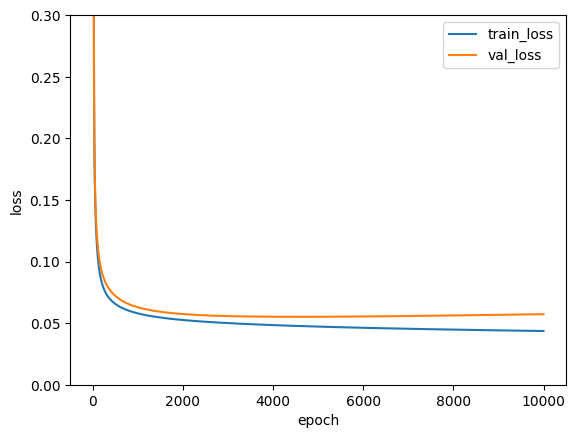

In [ ]:
plt.ylim(0, 0.3)
plt.plot(single_layer.losses)
plt.plot(single_layer.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

5장에서 그린 확률적 경사 하강법의 손실 그래프는 변동이 심한 반면, 배치 경사 하강법은 손실값이 안정적으로 감소한다.

12. 왜 이런 결과가 나오는지 가중치의 변화를 그래프로 나타내보자.

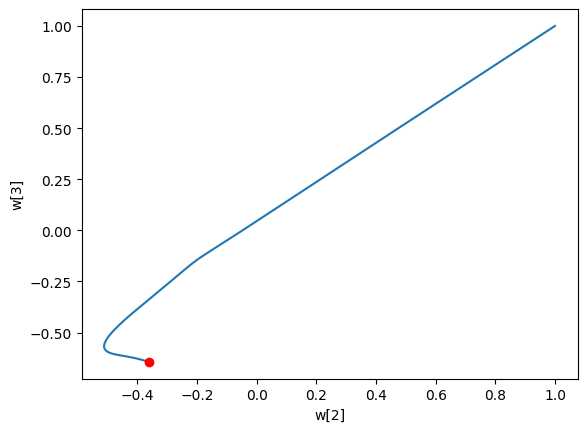

In [ ]:
w2 = []
w3 = []
for w in single_layer.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

배치 경사 하강법을 적용하니 가중치를 찾는 경로가 다소 부드러운 곡선의 형태를 띠는 것 같다. 가중치의 변화가 연속적이므로 손실값도 안정적으로 수렴된다.

# 06-2 2개의 층을 가진 신경망을 구현한다.

###하나의 층에 여러 개의 뉴런을 사용하자

하나의 층에 여러 개의 뉴런을 사용하면 입력층에서 전달되는 특성이 각 뉴런에 모두 전달될 것이다. 3개의 특성과 2개의 뉴런이 있는 경우를 가정해보자.
3개의 특성은 각가 2개의 뉴런에 모두 전달되어 z_1, z_2를 출력한다. z_1을 계산할때 x_1,x_2,x_3와 곱해지는 가중치 3개가 필요하고 z_2를 계산할 때도 가중치 3개가 필요하다.또한 가중치도 하나씩 필요하다. 이때 가중치를 입력 특성 번호와 뉴런의 번호로 표현하면 다음과 같은 계산식이 나온다.

$x_1w_{11}+x_2w_{21}+x_3w_{31}+b_1$ = z_1<br>
$x_1w_{12}+x_2w_{22}+x_3w_{32}+b_2$ = z_2

위의 식을 전체 샘플에 대해서 행렬식으로 나타내면아래와 같다.

$XW_1 +B =Z_1$


###출력을 하나로 모으자

z_1, z_2는 마지막 뉴런으로 모으기 전의 출력값이고 a_1, a_2는 활성화 함수에 통과시킨 값이다. 편의상 이 값을 그냥 출력이 아니라 활성화 출력이라 부르자. 2개의 활성화 출력이 마지막 뉴런에 입력되고 여기에 절편이 더해져 z가 더해져 z가 만들어진다.

샘플 1개에 대한 수식은

$a_1w_1+a_2w_2+b_2=z$ (선형 방정식)

전체 샘플에 대한 행렬 곱셈 표현은

$A_1W_2+b_2 = Z_2$ 이다.

행렬 A_1의 크기는 (전체 샘플 수, 2)이므로 (m,2)이고 W_2의 크기는 (입력의 크기, 출력의 크기)이므로 (2,1)이다.

###은닉층이 추가된 신경망을 알아보자.

2개의 뉴런과 2개의 층을 가진 신경망이 만들어졌다. 이때 입력값이 모여 있는 층은 입력층이라고 부르는데, 보통 입력층은 층의 개수에 포함시키지 않는다.

**입력과 출력은 행렬로 표기한다.**

행렬을 사용하면 여러 개의 뉴런이 있는 다층 신경망을 손쉽게 표현할 수 있다. 층을 많이 쌓은 신경망은 행렬의 개수가 많으므로 행렬 연산도 많이 수행해야 한다.



###다층 신경망의 개념을 정리하자.

마지막으로 다층 신경망에서 알아야 할 주의 사항과 개념을 정리해 보자.

**활성화 함수는 층마다 다를 수 있지만 한 층에서는 같아야 한다.**

각 층은 하나 이상의 뉴런을 가지는데, 은닉층과 출력층에 있는 모든 뉴런에는 활성화 함수가 필요하며 문제에 맞는 활성화 함수를 사용해야 한다. 단, 같은 층에 있는 뉴런은 모두 같은 활성화 함수를 사용해야 한다.

**모든 뉴런이 연결되어 있으면 완전 연결 신경망이라고 한다.**
위의 신경망은 입력층과 은닉층, 은닉층과 출력층 사이의 뉴런들이 모두 연결되어 있기 때문에 완전 연결(fully-connected) 신경망이라고 부른다. 완전 연결 신경망은 인공신경망의 한 종류이며, 가장 기본적인 신경망 구조이다. 이렇게 뉴런이 모두 연결되어 있는 층을 완전 연결층이라고도 부른다.


### 다층 신경망에 경사 하강법을 적용하자.

그럼 다층 신경망에는 경사 하강법이 어떻게 적용될까?

**가중치에 대하여 손실 함수를 미분하자(출력층)**


W_2에 대한 손실 함수의 미분을 연쇄 법칙으로 풀어 쓰면 다음과 같다.

$\frac{∂L}{∂W_2}$ = $\frac{∂L}{∂Z_2}$ $\frac{∂Z_2}{∂W_2}$


이것은 04장에서 살펴본 손실 함수의 미분을 행렬로 확장한 것과 같다. 즉, 아래의 식을 행렬로 표현하면 된다.

$\frac{∂L}{∂w_i}$ = $\frac{∂L}{∂z}$ $\frac{∂z}{∂w_i}$ = $-(y-a)x_i$

위 식에서 -(y-a)는 -(Y-A_2)에 해당한다.

$\frac{∂L}{∂Z_2}$ = $-(Y-A_2)$

x_i는 이전 층의 출력인 A_1으로 생각하면 된다.

$\frac{∂Z_2}{∂W_2}$ = $A_1 $




**도함구를 곱하자(출력층)**

행렬의 크기와 순서에 주의하며 곱하자.

$\frac{∂L}{∂W_2}$ = $\frac{∂L}{∂Z_2}$ $\frac{∂Z_2}{∂W_2}$  = $A^T_1(-(Y-A_2))$

현재 구한 그레이디언트 행렬은 모든 샘플에 대한 그레이디언트의 총 합이므로 가중치 행렬을 업데이트하기 위해서는 평균 그레이디언트를 구해야한다. 그런 다음 적절한 학습률을 곱하여 가중치 행렬 $W_2$를 업데이트 하면 된다.

**절편에 대하여 손실 함수를 미분하자(출력층)**

$Z_2$를 절편에 대하여 미분하면 1이다. 결국 절편 $b_2$에 대한 손실 함수의 도함수는 연쇄 법칙으로 다음과 같이 나타낼 수 있다.

$\frac{∂L}{∂b_2}$ = $\frac{∂L}{∂Z_2}$ $\frac{∂Z_2}{∂b_2}$  = $1^T(-(Y-A_2))$

여기서 구한 값 역시 모든 샘플에 대한 그레이디언트의 합이다. 이 값 역시 전체 샘플의 개수로 나눠 평균 그레이디언트를 구하면 된다.

**가중치에 대하여 손실 함수를 미분하자(은닉층)**

이제 가중치 $W_1$에 대하여 손실 함수를 미분해보자.

$\frac{∂L}{∂W_1}$ = $\frac{∂L}{∂Z_2}$ $\frac{∂Z_2}{∂A_1}$ $\frac{∂A_1}{∂Z_1}$$\frac{∂Z_1}{∂W_1}$

복잡해 보인다. 도함수를 하나씩 맞춰보자.

$\frac{∂Z_1}{∂W_1}$ = $X$

$\frac{∂A_1}{∂Z_1}$ = $A_1⨀(1-A_1)$  

$\frac{∂Z_2}{∂A_1}$ = $W_2$

$\frac{∂L}{∂Z_2}$ = $-(Y-A_2)$

**도함수를 곱하자(은닉층)**


$\frac{∂L}{∂Z_2}$ $\frac{∂Z_2}{∂A_1}$ = $-(Y-A_2)W^T_2$

이제 $\frac{∂A_1}{∂Z_1}$ 을 곱하면 된다.

$\frac{∂L}{∂Z_2}$ $\frac{∂Z_2}{∂A_1}$ $\frac{∂A_1}{∂Z_1}$ = $-(Y-A_2)W^T_2⨀A_1⨀(1-A_1)$  

이제 오차 그레이디언트가 은닉층의 활성화 함수를 통과했다.이제 $\frac{∂Z_1}{∂W_1}$는 $X$ 이므로 앞서 구한 식에 전치하여 곱하면 된다.

$\frac{∂L}{∂Z_2}$ $\frac{∂Z_2}{∂A_1}$ $\frac{∂A_1}{∂Z_1}$ $\frac{∂Z_1}{∂W_1}$ = $X^T(-(Y-A_2)W^T_2⨀A_1⨀(1-A_1))$  

최종으로 구한 그레이디언트 행렬은 전체 햄플에 대한 그레이디언트의 합이므로 전체 샘플 개수로 나누어 평균을 구해야 한다. 그런 다음 $W_1$을 업데이트 하는데 사용한다.

**절편에 대하여 손실 함수를 미분하고 도함수를 곱한다.**

$\frac{∂L}{∂Z_2}$ $\frac{∂Z_2}{∂A_1}$ $\frac{∂A_1}{∂Z_1}$ $\frac{∂Z_1}{∂b_1}$ = $1^T(-(Y-A_2)W^T_2⨀A_1⨀(1-A_1))$  


지금까지 다층 완전 연결 신경망의 경사 하강법 공식을 모두 유도해 보았다.

###2개의 층을 가진 신경망 구현하기


1. SingleLayer() 클래스를 상속한 DualLayer 클래스 만들기

파이썬에서 클래스를 상속하는 방법은 매우 간단하다. 클래스 이름 뒤에 소괄호로 상속하고자 하는 부모 클래스 이름을 감싸면 된다.



In [ ]:
class DualLayer(SingleLayer):
  def __init__(self, units=10, learning_rate=0.1, l1=0,l2=0):
    self.units = units       # 은닉층의 뉴런 개수
    self.w1 = None            # 은닉층의 가중치
    self.b1 = None           # 은닉층의 절편
    self.w2 = None           # 출력층의 가중치
    self.b2 = None           # 출력층의 절편
    self.a1 = None           # 은닉층의 활성화 출력
    self.losses = []         # 훈련 손실
    self.val_losses = []     # 검증 손실
    self.lr = learning_rate  # 학습률
    self.l1 = l1             # L1 손실 하이퍼파라미터
    self.l2 = l2             # L2 손실 하이퍼파라미터

DualLayer는 은닉층과 출력층의 가중치와 절편을 각각 w1, b1과 w2, b2에 저장한다. 은닉층의 활성화 출력은 역방향을 계산할 때 필요하므로 a1 변수에 저장한다. SingleLayer 클래스는 학습 과정을 이해하기 쉽도록 하기 위해 w_history 변수에 가중치의 변화를 기록했다. DualLayer 클래스에서는 가중치 변화를 기록하지 않는다.

2. forpass() 메서드 수정하기



In [ ]:
def forpass(self, x):
  z1 = np.dot(x, self.w1) + self.b1
  self.a1 = self.activation(z1)
  z2 = np.dot(self.a1, self.w2) + self.b2
  return z2

3. backprop() 메서드 수정하기

다음은 그레이디언트를 계산하는 backprop() 메서드이다.


In [ ]:
def backprop(self, x, err):
  m = len(x)   #샘플 개수
  # 출력층의 가중치와 절편에 대한 그레이디언트를 계산한다.
  w2_grad = np.dot(self.a1.T, err) / m
  b2_grad = np.sum(err) / m
  # 시그모이드 함수까지 그레이디언트를 계산하자.
  err_to_hidden = np.dot(err, self.w2.T) * self.a1 * (1-self.a1)
  # 은닉층의 가중치와 절편에 대한 그레이디언트를 계산한다.
  w1_grad = np.dot(x.T, err_to_hidden) / m
  b1_grad = np.sum(err_to_hidden, axis = 0) / m
  return w1_grad, b1_grad, w2_grad, b2_grad

4. fit() 메서드 수정하기

fit() 메서드가 할 일은 이전과 동일하다. 여기서는 fit() 메서드를  3 개의 작은 메서드로 쪼개자.

<br>
<br>
<br>


5. 먼저 fit() 메서드에 있던 가중치 초기화 부분을 init_weights() 메서드로 분리하자.

In [ ]:
def init_weights(self, n_features):
  self.w1 = np.ones((n_features, self.units)) # (특성 개수, 은닉층의 크기)
  self.b1 = np.zeros(self.units)              # 은닉층의 크기
  self.w2 = np.ones((self.units, 1))          # (은닉층의 크기, 1)
  self.b2 = 0

6. fit() 메서드의 for문 안에 있는 코드 중 일부를 training() 메서드로 분리하자.

In [ ]:
def fit(self, x, y, epochs = 100, x_val = None, y_val = None):
  y = y.reshape(-1,1)           # 타깃을 열 벡터로 바꾼다.
  y_val = y_val.reshape(-1, 1)
  m = len(x)                    # 샘플 개수를 저장
  self.init_weights(x.shape[1]) # 은닉층과 출력층의 가중치를 초기화
  # epochs만큼 반복
  for i in range(epochs):
    a = self.traininf(x, y, m)
    # 안전한 로그 계산을 위해 클리핑
    a = np.clip(a, 1e-10, 1-1e-10)
    # 로그 손실과 규제 손실을 더하여 리스트에 추가한다.
    loss = np.sum(-(y*np.log(a) + (1-y)*np.log(1-a)))
    self.losses.append(loss + self.reg_loss() / m)
    # 검증 세트에 대한 손실을 계산
    self.update_val_loss(x_val, y_val)

def training(self, x, y, m):
  z = self.forpass(x)             # 정방향 계산을 수행
  a = self.activation(z)          # 활성화 함수를 적용
  err = -(y - a)                  # 오차를 계산
  # 오차를 역전파하여 그레이디언트를 계산
  w1_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
  # 그레이디언트에서 페널티 항의 미분값을 뺀다.
  w1_grad += (self.l1 * np.sign(self.w1) + self.l2 * self.w1) / m
  w2_grad += (self.l1 * np.sign(self.w2) + self.l2 * self.w2) / m
  # 은닉층의 가중치와 절편을 업데이트한다.
  self.w1 -= self.lr * w1_grad
  self.b1 -= self.lr * b1_grad
  # 출력층의 가중치와 절편을 업데이트하자
  self.w2 -= self.lr * w2_grad
  self.b2 -= self.lr * b2_grad
  return a


7. ref_loss() 메서드 수정하기

reg_loss() 메서드는 은닉층과 출력층의 가중치에 대한 L1, L2 손실을 계산

In [ ]:
def ref_loss(self):
  #은닉층과 출력층의 가중치에 규제를 적용
  return self.l1 * (np.sum(np.abs(self.w1)) + np.sum(np.abs(self.w2))) + \
         self.l2 / 2 *(np.sum(self.w1**2) + np.sum(self.w2**2))

 - 코드 총 정리


In [ ]:
class DualLayer(SingleLayer):

    def __init__(self, units=10, learning_rate=0.1, l1=0, l2=0):
        self.units = units         # 은닉층의 뉴런 개수
        self.w1 = None             # 은닉층의 가중치
        self.b1 = None             # 은닉층의 절편
        self.w2 = None             # 출력층의 가중치
        self.b2 = None             # 출력층의 절편
        self.a1 = None             # 은닉층의 활성화 출력
        self.losses = []           # 훈련 손실
        self.val_losses = []       # 검증 손실
        self.lr = learning_rate    # 학습률
        self.l1 = l1               # L1 손실 하이퍼파라미터
        self.l2 = l2               # L2 손실 하이퍼파라미터

    def forpass(self, x):
        z1 = np.dot(x, self.w1) + self.b1        # 첫 번째 층의 선형 식을 계산합니다
        self.a1 = self.activation(z1)            # 활성화 함수를 적용합니다
        z2 = np.dot(self.a1, self.w2) + self.b2  # 두 번째 층의 선형 식을 계산합니다.
        return z2

    def backprop(self, x, err):
        m = len(x)       # 샘플 개수
        # 출력층의 가중치와 절편에 대한 그래디언트를 계산합니다.
        w2_grad = np.dot(self.a1.T, err) / m
        b2_grad = np.sum(err) / m
        # 시그모이드 함수까지 그래디언트를 계산합니다.
        err_to_hidden = np.dot(err, self.w2.T) * self.a1 * (1 - self.a1)
        # 은닉층의 가중치와 절편에 대한 그래디언트를 계산합니다.
        w1_grad = np.dot(x.T, err_to_hidden) / m
        b1_grad = np.sum(err_to_hidden, axis=0) / m
        return w1_grad, b1_grad, w2_grad, b2_grad

    def init_weights(self, n_features):
        self.w1 = np.ones((n_features, self.units))  # (특성 개수, 은닉층의 크기)
        self.b1 = np.zeros(self.units)               # 은닉층의 크기
        self.w2 = np.ones((self.units, 1))           # (은닉층의 크기, 1)
        self.b2 = 0

    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        y = y.reshape(-1, 1)          # 타깃을 열 벡터로 바꿉니다.
        y_val = y_val.reshape(-1, 1)
        m = len(x)                    # 샘플 개수를 저장합니다.
        self.init_weights(x.shape[1]) # 은닉층과 출력층의 가중치를 초기화합니다.
        # epochs만큼 반복합니다.
        for i in range(epochs):
            a = self.training(x, y, m)
            # 안전한 로그 계산을 위해 클리핑합니다.
            a = np.clip(a, 1e-10, 1-1e-10)
            # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
            loss = np.sum(-(y*np.log(a) + (1-y)*np.log(1-a)))
            self.losses.append((loss + self.reg_loss()) / m)
            # 검증 세트에 대한 손실을 계산합니다.
            self.update_val_loss(x_val, y_val)

    def training(self, x, y, m):
        z = self.forpass(x)       # 정방향 계산을 수행합니다.
        a = self.activation(z)    # 활성화 함수를 적용합니다.
        err = -(y - a)            # 오차를 계산합니다.
        # 오차를 역전파하여 그래디언트를 계산합니다.
        w1_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
        # 그래디언트에 페널티 항의 미분 값을 더합니다
        w1_grad += (self.l1 * np.sign(self.w1) + self.l2 * self.w1) / m
        w2_grad += (self.l1 * np.sign(self.w2) + self.l2 * self.w2) / m
        # 은닉층의 가중치와 절편을 업데이트합니다.
        self.w1 -= self.lr * w1_grad
        self.b1 -= self.lr * b1_grad
        # 출력층의 가중치와 절편을 업데이트합니다.
        self.w2 -= self.lr * w2_grad
        self.b2 -= self.lr * b2_grad
        return a

    def reg_loss(self):
        # 은닉층과 출력층의 가중치에 규제를 적용합니다.
        return self.l1 * (np.sum(np.abs(self.w1)) + np.sum(np.abs(self.w2))) + \
               self.l2 / 2 * (np.sum(self.w1**2) + np.sum(self.w2**2))

### 모델 훈련하기

1. 다층 신경망 모델 훈련하고 평가하기

In [ ]:
dual_layer = DualLayer(l2 = 0.01)
dual_layer.fit(x_train_scaled, y_train, x_val = x_val_scaled, y_val = y_val, epochs = 20000)
dual_layer.score(x_val_scaled, y_val)

0.978021978021978

2. 훈련 손실과 검증 손실 그래프 분석하기


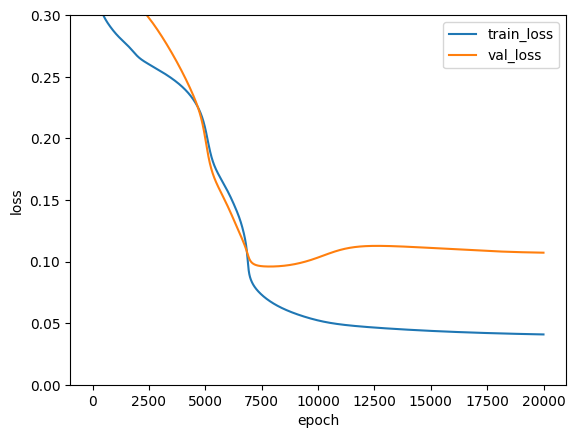

In [ ]:
plt.ylim(0, 0.3)
plt.plot(dual_layer.losses)
plt.plot(dual_layer.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

손실 그래프가 이전보다 천천히 감소하고 있다. SingleLayer 클래스보다 가중치의 개수가 훨씬 많아져 학습하는데 시간이 오래 걸리기 때문이다. 위스콘신 유방암 데이터의 특성이 30개이므로 SingleLayer 클래스를 사용했을 때는 가중치 30개와 절편 1개가 필요하다.DualLayer 클래스에서는 은닉층의 뉴런이 10개였으므로 30 x 10개의 가중치와 10개의 절편이 필요하고 출력층 역시 10개의 가중치와 1개의 절편이 필요하다. 즉, 이 Duallayer 모델은 총 321개의 가중치를 학습해야 한다.

### 가중치 초기화 개선하기

손실 그래프를 보니 초기 손실값이 감소하는 곡선이 매끄럽지 않다. 아마도 손실 함수가 감소하는 방향을 올바르게 찾는 데 시간이 많이 소요된 것 같다. 이는 가중치 초기화와 관련이 깊다. 지금까지는 가중치를 1로 놓고 훈련을 시작했다. 이번에는 넘파이의 random.normal() 함수를 사용하여 정규 분포를 따르는 무작위 수로 가중치를 초기화하자.

1. 가중치 초기화를 위한 init_weights() 메서드 수정하기

Dual 클래스를 상속한 RandomInitNetwork 클래스를 만들고 가중치를 초기화하는 init_weights() 메서드만 고치면 손쉽게 구현할 수 있다.

In [ ]:
class RandomInitNetwork(DualLayer):
  def init_weights(self, n_features):
    np.random.seed(42)
    self.w1 = np.random.normal(0, 1,
                               (n_features, self.units))   # (특성 개수, 은닉층의 크기)
    self.b1 = np.zeros(self.units)                         # 은닉층의 크기
    self.w2 = np.random.normal(0, 1, (self.units, 1))      # (은닉층의 크기, 1)
    self.b2 = 0


2. 모델 훈련

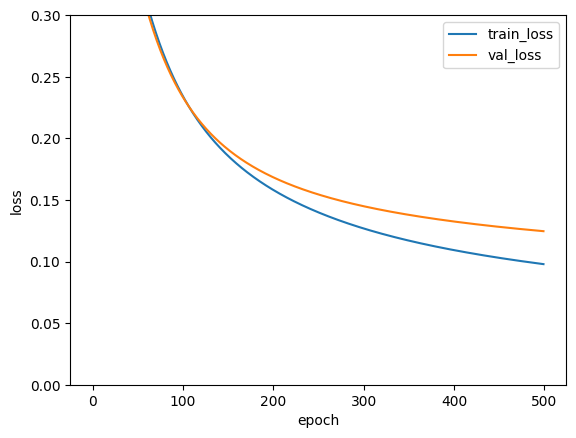

In [ ]:
random_init_net = RandomInitNetwork(l2=0.01)
random_init_net.fit(x_train_scaled, y_train,
                    x_val = x_val_scaled, y_val = y_val, epochs = 500)
plt.ylim(0, 0.3)
plt.plot(random_init_net.losses)
plt.plot(random_init_net.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

# 06-3 미니 배치를 사용하여 모델을 훈련합니다.

### 미니 배치 경사 하강법을 알아보자.

미니 배치 경사 하강법은 작게 나눈 미니 배치만큼 가중치를 업데이트한다. 미니 배치의 크기는 보통 16, 32, 64 등 2의 배수를 사용한다. 미니 배치의 크기가 1이면 확률적 경사 하강법이 된다. 미니 배치의 크기도 하이퍼파라미터이고 튜닝의 대상이다.

### 미니 배치 경사 하강법을 구현한다.

1. MinibatchNetwork 클래스 구현하기

메서드에 batch_size 매개변수 추가

In [ ]:
class MinibatchNetwork(RandomInitNetwork):
  def __init__(self, units = 10, batch_size = 32, learning_rate = 0.1, l1=0, l2=0):
    super().__init__(units, learning_rate, l1, l2)
    self.batch_size = batch_size         # 배치 크기

2. fit() 메서드 수정하기

fit() 메서드는 거의 비슷하지만 다음처럼 에포크를 순회하는 for문 안에 미니 배치를 순회하는 for문이 추가된다.

In [ ]:
def fit(self, x, y , epochs = 100, x_val = None, y_val=None):
  y_val = y_val.reshape(-1, 1)                # 타깃을 열 벡터로 바꾼다
  self.init_weights(x.shape[1])               # 은닉층과 출력층의 가중치를 초기화한다.
  np.random.seed(42)
  # epochs 만큼 반복
  for i in range(epochs):
    loss = 0
    # 제너레이터 함수에서 반환한 미니 배치를 순환
    for x_batch, y_batch in self.gen_batch(x, y):
      y_batch = y_batch.reshape(-1, 1)        # 타깃을 열 벡터로 바꾼다
      m = len(x_batch)
      a = self.training(x_batch, y_batch, m)
      # 안전한 로그 계산을 위해 클리핑
      a = np.clip(a, 1e-10, 1-1e-10)
      # 로그 손실과 규제 손실을 더하여 리스트에 추가
      loss += np.sum(-(y_batch*np.log(a) + (1-y_batch) * np.log(1-a)))
    self.losses.append((loss + self.reg_loss()) / len(x))
    # 검증 세트에 대한 손실을 계산
    self.update_val_loss(x_val, y_val)

gen_batch() 메서드는 전체 훈련 데이터 x,y를 전달받아 batch_size 만큼 미니 배치를 만들어 반환한다. 그런 다음 반환된 미니 배치 데이터 x_batch, y_batch를 training() 메서드에 전달한다. training() 메서드는 그대로 사용할 수 있으므로 미니 배치 방식을 간단하게 구현할 수 있다는 것이다. 앞에서 DualLayer의 fit() 메서드와 다른 점은 샘플 개수 m을 미니 배치마다 계산한다는 것이다. 또한 두 번째 for 문에서 손실을 누적하기 위해 에포크마다 loss 변수를 초기화한다. 이제 남은 작업은 gen_batch() 메서드를 만드는 일이다.

3. gen_batch() 메서드 만들기

gen_batch() 메서드는 파이썬 제너레이터(generator)로 구현한다. 제너레이터 함수를 만드는 방법은 간단하다. 보통의 함수에 yield 문을 사용하면 된다.



In [ ]:
# 미니 배치 제너레이터 함수
def gen_batch(self, x, y):
  length = len(x)
  bins = length // self.batch_size           # 미니 배치 횟수
  if length % self.batch_size:
    bins += 1                                # 나누어 떨어지지 않을 때
  indexes = np.random.permutation(np.arange(len(x)))   #인덱스를 섞는다.
  x = x[indexes]
  y = y[indexes]
  for i in range(bins):
    start = self.batch_size * i
    end = self.batch_size * (i + 1)
    yield x[start:end],y[start:end]         # batch_size만큼 슬라이싱하여 반환한다.

gen_batch() 메서드는 batch_size만큼씩 x, y 배열을 건너뛰며 미니 배치를 반환한다.

4. 미니 배치 경사 하강법 적용하기

cancer 데이터 세트에 미니 배치 경사 하강법을 적용해보자. batch_size를 기본값 32로 하여 훈련한다. 그런 다음 batch_size를 128로 늘려서 다시 훈현하고 두 결과를 비교하자.

0.978021978021978


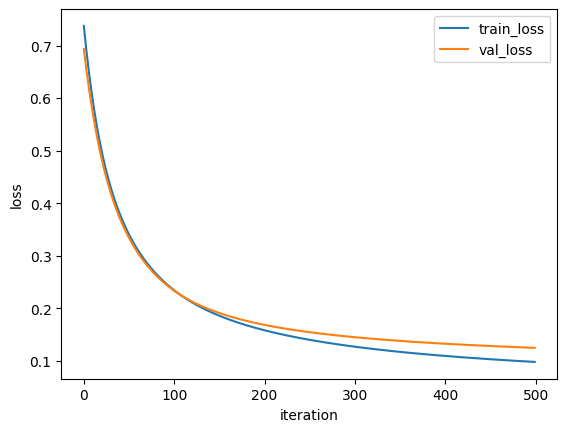

In [ ]:
minibatch_net = MinibatchNetwork(l2=0.01, batch_size = 32)
minibatch_net.fit(x_train_scaled, y_train, x_val = x_val_scaled, y_val = y_val,
                  epochs = 500)
print(minibatch_net.score(x_val_scaled, y_val))

#그래프
plt.plot(minibatch_net.losses)
plt.plot(minibatch_net.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

5. 이제 미니 배치 크기를 늘려서 다시 시도

0.978021978021978


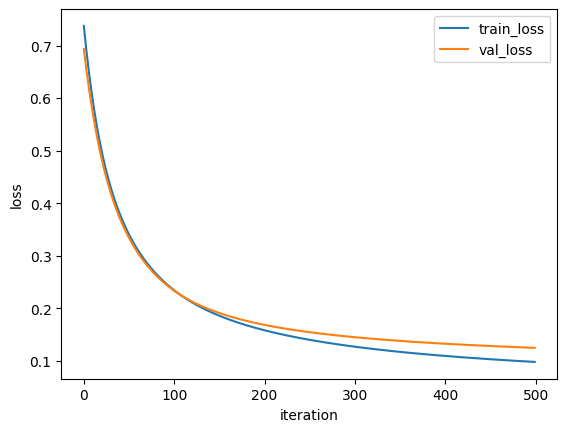

In [ ]:
minibatch_net = MinibatchNetwork(l2=0.01, batch_size = 128)
minibatch_net.fit(x_train_scaled, y_train, x_val = x_val_scaled, y_val = y_val,
                  epochs = 500)
print(minibatch_net.score(x_val_scaled, y_val))

#그래프
plt.plot(minibatch_net.losses)
plt.plot(minibatch_net.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

batch_size를 128로 늘렸더니 손실 그래프는 조금 더 안정적으로 바뀌었지만 손실값이 줄어드는 속도는 느려졌다. 일반적으로 미니 배치의 크기는 32 ~ 512개 사이의 값을 지정한다.

### 사이킷런 사용해 다층 신경망 훈련하기.

사이킷런은 sklearn.neural_network 모듈 아래에 분류 작업을 위한 MLPClassifier, 회귀 작업을 위한 MLPRegressor를 제공한다. cancer 데이터 세트에 MLPClassifier 클래스를 적용하고 비교해보자.

 * MLP는 다층 퍼셉트론(Multi-Layer-Perceptron)의 약자이다.


1. MLPClassifier의 객체 만들기.

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes = (10,), activation = 'logistic',
                    solver = 'sgd', alpha = 0.01, batch_size = 32,
                    learning_rate_init = 0.1, max_iter = 500)

MLPClassifier의 주요 매개변수를 정리한 것

**은닉층의 크기를 정의하는 hidden_layer_size**
<br>
**활성화 함수를 지정하는 activation**
<br>
**경사 하강법 알고리즘의 종류를 지정하는 매개변수 solver**
<br>
**규제를 적용하기 위한 매개변수 alpha**
<br>
**배치 크기, 학습률 초깃값, 에포크 횟수를 정하는 매개변수 batch_size, learning_rate_init, max_iter**

2. 모델 훈련하기.


In [ ]:
mlp.fit(x_train_scaled, y_train)
mlp.score(x_val_scaled, y_val)

0.989010989010989